<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

## 04 Data Visualisations used in Presentation

> SG-DSI-41 Group 01: Daryl Chia, Germaine Choo, Lionel Foo

---

## 01. Import Libraries

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

## 02. Load the Data

In [3]:
# Load data:
hdb = pd.read_csv('data/train.csv')

C:\Users\germc\AppData\Local\Temp\ipykernel_28008\1746374103.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv('data/train.csv')


## 03. Clean Data

### 03.01 Convert the Relevant Column Names to Lowercase

In [3]:
# Convert the relevant column names to lowercase:
hdb.columns = hdb.columns.str.lower()

### 03.02 Represent Data in the Relevant Columns with Binary Categories as Integer Values

In [4]:
# Represent data in the relevant columns with binary categories as integer values:
hdb['residential'] = hdb['residential'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['commercial'] = hdb['commercial'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['market_hawker'] = hdb['market_hawker'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['multistorey_carpark'] = hdb['multistorey_carpark'].map(lambda var: int(1) if var == 'Y' else int(0))
hdb['precinct_pavilion'] = hdb['precinct_pavilion'].map(lambda var: int(1) if var == 'Y' else int(0))

### 03.03 Drop the Rows where Column `mall_nearest_distance` has Null Values

In [5]:
# Drop the rows where column 'mall_nearest_distance' has null values:
hdb = hdb[hdb['mall_nearest_distance'].notnull()]

### 03.04. Impute Null Values in the Relevant Columns with 0

In [6]:
# Impute null values in the relevant columns with 0:
hdb['mall_within_500m'].fillna(0, inplace=True)
hdb['mall_within_1km'].fillna(0, inplace=True)
hdb['mall_within_2km'].fillna(0, inplace=True)
hdb['hawker_within_500m'].fillna(0, inplace=True)
hdb['hawker_within_1km'].fillna(0, inplace=True)
hdb['hawker_within_2km'].fillna(0, inplace=True)

### 03.05 Redefine the Column `hdb_age` as the Time Frame from Lease Commencement Date (`lease_commence_date`) to Transaction Year (`tranc_year`)

In [7]:
# Redefine the column 'hdb_age' as the time frame from 'lease_commence_date' to 'tranc_year':
hdb['hdb_age'] = hdb['tranc_year'] - hdb['lease_commence_date']

### 04. Visualisation
Based on features with high absolute coefficient values and domain knowledge, numerical features are analysed against resale prices to depict a clearer relationship for presentation.

#### 04. 01 Resale Prices against Floor Area & Flat Types
Understanding if the relationship between flat area and price is consistent/ similar across different planning areas. Exploring areas in the higher and lower range of resale prices; Bukit Timah, Bishan and Woodlands.

c:\Users\germc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Bukit Timah')

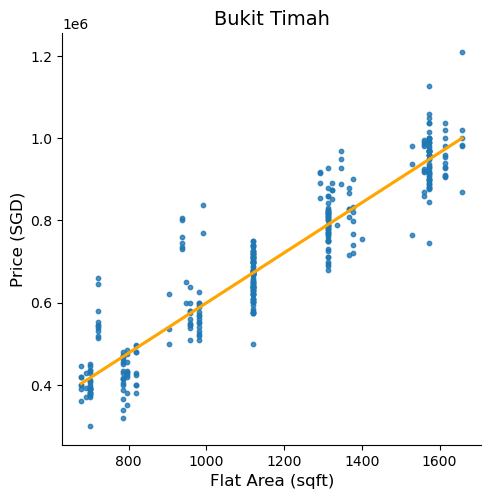

In [8]:
bukittimah = pd.DataFrame()
bukittimah['sqft'] = hdb['floor_area_sqft'][hdb['planning_area'] == 'Bukit Timah']
bukittimah['price'] = hdb['resale_price'][hdb['planning_area'] == 'Bukit Timah']

sns.lmplot(x='sqft', y='price', data=bukittimah, ci=False, scatter_kws={'s': 10}, line_kws={'color': 'orange'})
plt.xlabel('Flat Area (sqft)', fontsize=12)
plt.ylabel('Price (SGD)', fontsize=12)
plt.title('Bukit Timah', fontsize=14)


c:\Users\germc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Bishan')

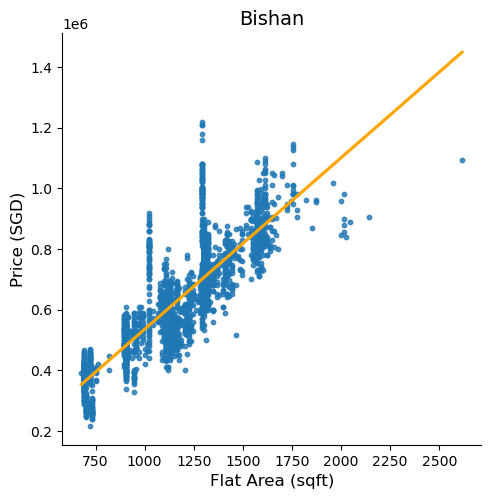

In [9]:
bishan = pd.DataFrame()
bishan['sqft'] = hdb['floor_area_sqft'][hdb['planning_area'] == 'Bishan']
bishan['price'] = hdb['resale_price'][hdb['planning_area'] == 'Bishan']

sns.lmplot(x='sqft', y='price', data=bishan, ci=False, scatter_kws={'s': 10}, line_kws={'color': 'orange'})
plt.xlabel('Flat Area (sqft)', fontsize=12)
plt.ylabel('Price (SGD)', fontsize=12)
plt.title('Bishan', fontsize=14)

c:\Users\germc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


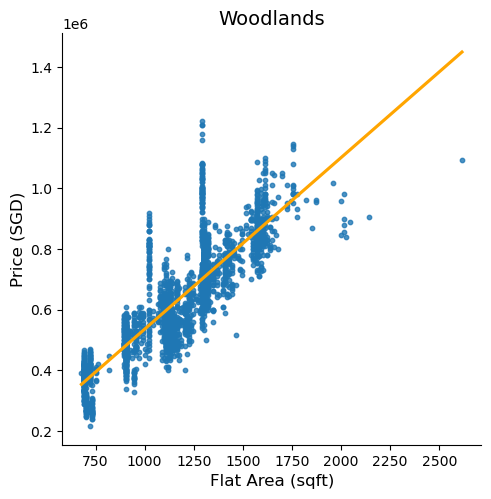

In [10]:
woodlands = pd.DataFrame()
woodlands['sqft'] = hdb['floor_area_sqft'][hdb['planning_area'] == 'Woodlands']
woodlands['price'] = hdb['resale_price'][hdb['planning_area'] == 'Woodlands']

sns.lmplot(x='sqft', y='price', data=bishan, ci=False, scatter_kws={'s': 10}, line_kws={'color': 'orange'})
plt.xlabel('Flat Area (sqft)', fontsize=12)
plt.ylabel('Price (SGD)', fontsize=12)
plt.title('Woodlands', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

#### Expanding plot to all planning areas for any clear relationship. 
However this plot was not used as it's not as clear/ provide meaningful insights.

C:\Users\germc\AppData\Local\Temp\ipykernel_20432\906718028.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\germc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


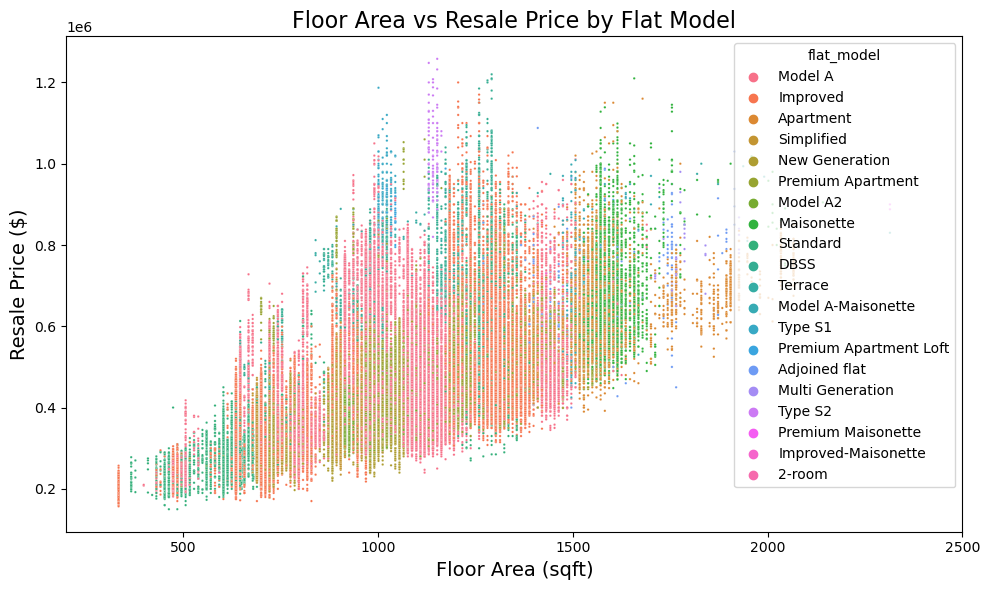

In [12]:
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
sns.scatterplot(data=hdb, x="floor_area_sqft", y="resale_price", hue="flat_model", s=3)

# Set labels and title for the scatterplot
plt.xlabel('Floor Area (sqft)', fontsize=14)
plt.ylabel('Resale Price ($)', fontsize=14)
plt.title('Floor Area vs Resale Price by Flat Model', fontsize=16)

plt.xlim(right=2500)

# Show plot
plt.tight_layout()
plt.show()

#### Exploring and assessing if this relationship is also observed across different flat types as well.

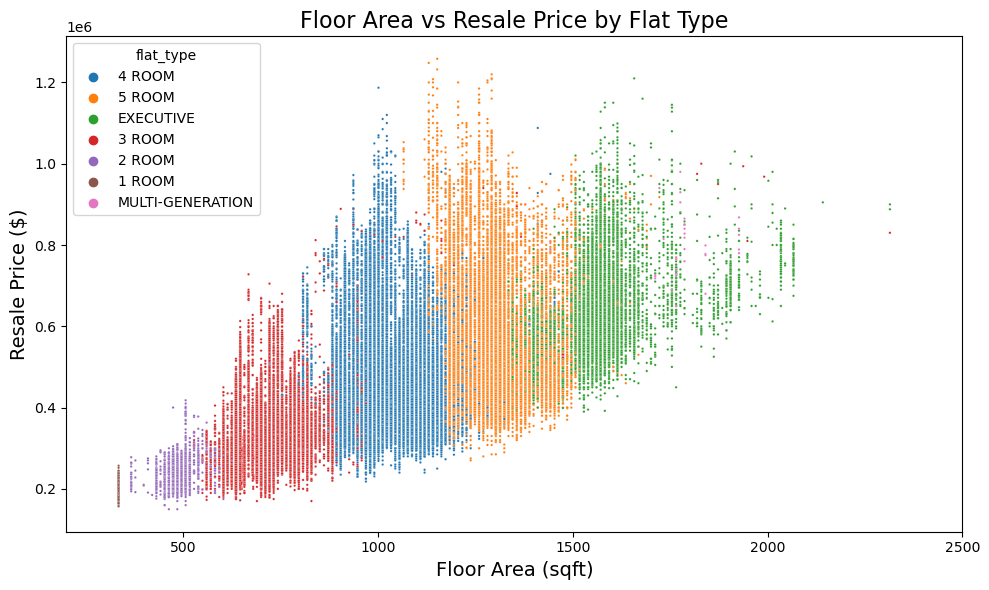

In [13]:
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
sns.scatterplot(data=hdb, x="floor_area_sqft", y="resale_price", hue="flat_type", s=3)

# Set labels and title for the scatterplot
plt.xlabel('Floor Area (sqft)', fontsize=14)
plt.ylabel('Resale Price ($)', fontsize=14)
plt.title('Floor Area vs Resale Price by Flat Type', fontsize=16)

plt.xlim(right=2500)

# Show plot
plt.tight_layout()
plt.show()

#### Conclusion:
Flat types do not significantly change the relationship between the floor area and resale prices. Flat types with higher floor area also see higher prices, instead of potentially having e.g. executive flats with lower floor area see higher prices compared to 4 room flats with higher floor area.

Last plot was used for presentation instead to show the relationship across all flat types for better generalisation.

#### 04. 02 Resale Prices against Flat Age
Analysing if there're any anomalies or a clear relationship between flat age and resale prices.

C:\Users\germc\AppData\Local\Temp\ipykernel_20432\87421417.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=hdb, x='hdb_age', y='resale_price', estimator=np.median, join=False, markers='o', color='blue', ci=None)


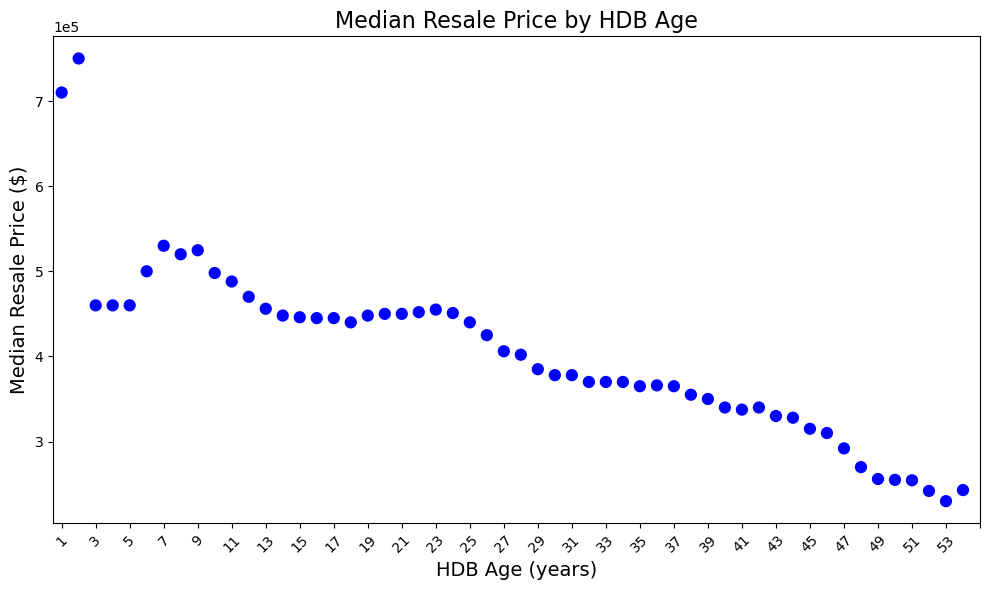

In [14]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create a scatterplot for the median 'resale_price' by 'hdb_age' without confidence intervals
sns.pointplot(data=hdb, x='hdb_age', y='resale_price', estimator=np.median, join=False, markers='o', color='blue', ci=None)

# Set labels and title for the scatterplot
plt.xlabel('HDB Age (years)', fontsize=14)
plt.ylabel('Median Resale Price ($)', fontsize=14)
plt.title('Median Resale Price by HDB Age', fontsize=16)

# Set the frequency of x-axis tick marks (show every 2nd label)
plt.xticks(rotation=45, ticks=np.arange(0, hdb['hdb_age'].max()+1, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Show plot
plt.tight_layout()
plt.show()

Analysing the anomalies of much higher resale prices for lower flat ages.

In [15]:
hdb['resale_price'][hdb['hdb_age'] < 3].groupby(hdb['planning_area']).count()

planning_area
Bedok           2
Bukit Merah    24
Bukit Timah     2
Clementi        2
Kallang         1
Punggol         1
Queenstown     65
Sengkang        3
Name: resale_price, dtype: int64

#### Conclusion:
Clear relationship observed where increase in hdb age sees a drop in resale prices. Much newer flats have much higher resale prices due to their location in planning areas with typically higher resale prices. 
This is also evident in the regression model where Bukit Merah and Queenstown have relatively high coefficient values as compared to all other features.